# для проекта по блоку "Работа аналитика в компании"  AIC-9

## Анализ данных для построения управленческого дашборда для ритейл компании

In [1]:
import pandas as pd
from datetime import datetime


In [2]:
import matplotlib.pyplot as plt

### загрузка данных

In [3]:
#импорт
df_retail = pd.read_csv('Data_Sample_AIC-9_Online_Retail.csv')
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,"3,39",17850.0,United Kingdom
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,"1,69",13047.0,United Kingdom
2,536367,21755,LOVE BUILDING BLOCK WORD,3,12/1/10 8:34,"5,95",13047.0,United Kingdom
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,12/1/10 8:34,"4,95",13047.0,United Kingdom
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 9:02,"2,75",17850.0,United Kingdom


Описание полей:
- **InvoiceNo** номер чека
- **StockCode** код товара
- **Description** описание товара
- **Quantity** кол-во товара
- **InvoiceDate** дата и время чека
- **UnitPrice** цена за единицу товара
- **CustomerID** ИД покупателя
- **Country** страна покупателя

In [4]:
len(df_retail)

54214

In [5]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 8 columns):
InvoiceNo      54214 non-null object
StockCode      54214 non-null object
Description    54080 non-null object
Quantity       54214 non-null int64
InvoiceDate    54214 non-null object
UnitPrice      54214 non-null object
CustomerID     40643 non-null float64
Country        54214 non-null object
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ MB


54214 строк

есть строки с незаполненными полями **Description** описание товара и **CustomerID** ИД покупателя

In [6]:
#переводим в формат даты
df_retail['InvoiceDate'] = df_retail.InvoiceDate.astype('datetime64')

In [7]:
#переводим в числовой формат
df_retail['UnitPrice'] = df_retail['UnitPrice'].str.replace(',', '.')
df_retail['UnitPrice'] = df_retail.UnitPrice.astype('float64')

In [8]:
#добавляем расчетное поле Стоимость
df_retail['Cost'] = df_retail['Quantity'] * df_retail['UnitPrice']

In [9]:
def get_my(row):
    return datetime.strftime(row['InvoiceDate'], '%Y-%m')

df_retail['InvoiceYearMonth']  = df_retail.apply(get_my, axis=1)

In [10]:
def get_dmy(row):
    return datetime.strftime(row['InvoiceDate'], '%Y-%m-%d')

df_retail['InvoiceYearMonthDay']  = df_retail.apply(get_dmy, axis=1)

In [11]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,InvoiceYearMonth,InvoiceYearMonthDay
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12,2010-12-01
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010-12,2010-12-01
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010-12,2010-12-01
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01


### анализ данных

#####  списание товара

допустим, что записи, в которых кол-во товара (Quantity) отрицательно и покупатель не заполнен (CustomerID), будут означать списание товара

In [12]:
#списаный товар
df_write_off = df_retail[ (df_retail['Quantity'] < 0) & (pd.isnull(df_retail['CustomerID']))]
df_write_off.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,InvoiceYearMonth,InvoiceYearMonthDay
731,536998,85067,NaN,-6,2010-12-03 15:30:00,0.00,NaN,United Kingdom,-0.0,2010-12,2010-12-03
732,537005,21692,NaN,-70,2010-12-03 15:35:00,0.00,NaN,United Kingdom,-0.0,2010-12,2010-12-03
733,537009,84534B,NaN,-80,2010-12-03 15:38:00,0.00,NaN,United Kingdom,-0.0,2010-12,2010-12-03
734,537018,84562A,NaN,-3,2010-12-03 15:42:00,0.00,NaN,United Kingdom,-0.0,2010-12,2010-12-03
1166,C537251,22620,4 TRADITIONAL SPINNING TOPS,-8,2010-12-06 10:45:00,1.25,NaN,United Kingdom,-10.0,2010-12,2010-12-06


In [13]:
len(df_write_off)

162

In [14]:
#уникальные значения в столбце
df_write_off['CustomerID'].unique()

array([nan])

In [15]:
#списано ед. товара
df_WO = df_write_off.groupby('InvoiceYearMonth').agg({'Quantity': 'sum', 'InvoiceNo': 'count'})
df_WO.rename(columns={'Quantity': 'TotalQuantityWriteOff', 'InvoiceNo': 'CountOrderWriteOff'}, inplace=True)
df_WO

,TotalQuantityWriteOff,CountOrderWriteOff
InvoiceYearMonth,,
2010-12,-1167,12
2011-01,-545,7
2011-02,-307,8
2011-03,-1520,14
2011-04,-578,24
2011-05,-684,8
2011-06,-10060,18
2011-07,-772,15
2011-08,-543,7


In [16]:
#коды товаров, которые списали
StockCode_write_off = df_write_off['StockCode'].value_counts()
StockCode_write_off = StockCode_write_off.reset_index()
StockCode_write_off.rename(columns={'index': 'StockCode_write_off', 'StockCode': 'CountUnit_write_off'}, inplace=True)
StockCode_write_off

,StockCode_write_off,CountUnit_write_off
0,POST,7
1,S,6
2,M,5
3,84809A,2
4,BANK CHARGES,2
...,...,...
134,84899F,1
135,22983,1
136,84279B,1
137,35648,1


#####  возврат товара

допустим, что записи, в которых кол-во товара (Quantity) отрицательно и покупатель известен (CustomerID), будут означать возврат товара

In [17]:
#возврат товара
df_return = df_retail[ (df_retail['Quantity'] < 0) & (~pd.isnull(df_retail['CustomerID'])) ]
df_return.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,InvoiceYearMonth,InvoiceYearMonthDay
19,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65,2010-12,2010-12-01
30,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12,2010-12-01
31,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96,2010-12,2010-12-01
202,C536548,20957,PORCELAIN HANGING BELL SMALL,-1,2010-12-01 14:33:00,1.45,12472.0,Germany,-1.45,2010-12,2010-12-01
375,C536642,21463,MIRRORED DISCO BALL,-1,2010-12-02 11:56:00,5.95,14390.0,United Kingdom,-5.95,2010-12,2010-12-02


In [18]:
len(df_return)

921

In [19]:
#возврат
df_R = df_return.groupby('InvoiceYearMonth').agg({'Cost': 'sum', 'InvoiceNo': 'count'})
df_R.rename(columns={'Cost': 'TotalCostReturn', 'InvoiceNo': 'CountOrderReturn'}, inplace=True)
df_R['AverageReturn'] = df_R['TotalCostReturn'] / df_R['CountOrderReturn']
df_R = df_R.reset_index()
df_R

,InvoiceYearMonth,TotalCostReturn,CountOrderReturn,AverageReturn
0,2010-12,-3021.19,76,-39.752500
1,2011-01,-1894.70,65,-29.149231
2,2011-02,-2809.22,47,-59.770638
3,2011-03,-1029.43,74,-13.911216
4,2011-04,-1686.47,49,-34.417755
5,2011-05,-8481.28,57,-148.794386
6,2011-06,-881.80,56,-15.746429
7,2011-07,-2445.25,79,-30.952532
8,2011-08,-5377.84,74,-72.673514
9,2011-09,-5869.96,79,-74.303291


In [20]:
#коды товаров, которые возвращали
StockCode_Return = df_return['StockCode'].value_counts()
StockCode_Return = StockCode_Return.reset_index()
StockCode_Return.rename(columns={'index': 'StockCodeReturn', 'StockCode': 'CountUnitReturn'}, inplace=True)
StockCode_Return

,StockCodeReturn,CountUnitReturn
0,22423,22
1,M,21
2,D,13
3,22666,10
4,21314,8
...,...,...
589,90177A,1
590,22839,1
591,22148,1
592,23015,1


In [21]:
df_return[ df_return.StockCode=='M']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,InvoiceYearMonth,InvoiceYearMonthDay
8920,C543789,M,Manual,-1,2011-02-11 17:10:00,856.48,17450.0,United Kingdom,-856.48,2011-02,2011-02-11
9038,C543841,M,Manual,-1,2011-02-14 11:20:00,208.16,17095.0,United Kingdom,-208.16,2011-02,2011-02-14
9811,C544577,M,Manual,-1,2011-02-21 14:02:00,320.69,12365.0,Cyprus,-320.69,2011-02,2011-02-21
10175,C544814,M,Manual,-1,2011-02-23 16:36:00,30.19,15590.0,United Kingdom,-30.19,2011-02,2011-02-23
12408,C546879,M,Manual,-96,2011-03-17 17:14:00,0.91,16422.0,United Kingdom,-87.36,2011-03,2011-03-17
14183,C548454,M,Manual,-1,2011-03-31 11:42:00,0.22,16422.0,United Kingdom,-0.22,2011-03,2011-03-31
14595,C548830,M,Manual,-1,2011-04-04 13:08:00,162.60,12744.0,Singapore,-162.60,2011-04,2011-04-04
17359,C551551,M,Manual,-1,2011-05-03 10:08:00,0.29,17841.0,United Kingdom,-0.29,2011-05,2011-05-03
17425,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,-6930.00,2011-05,2011-05-03
18349,C552553,M,Manual,-1,2011-05-10 10:51:00,334.71,15674.0,United Kingdom,-334.71,2011-05,2011-05-10


#####  брошенные корзины

допустим, что записи, в которых кол-во товара (Quantity) положительно и покупатель не заполнен (CustomerID), будут означать  товары, занесенные в корзину, но не оплаченные, то есть "товары из брошенной корзины"

In [22]:
#неоплаченный заказ (брошенные корзины)
df_abandoned_basket = df_retail[ (df_retail['Quantity'] > 0) & (pd.isnull(df_retail['CustomerID'])) ]
df_abandoned_basket.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,InvoiceYearMonth,InvoiceYearMonthDay
158,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,2.51,2010-12,2010-12-01
159,536544,21870,I CAN ONLY PLEASE ONE PERSON MUG,1,2010-12-01 14:32:00,3.36,NaN,United Kingdom,3.36,2010-12,2010-12-01
160,536544,21879,HEARTS GIFT TAPE,1,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1.66,2010-12,2010-12-01
161,536544,21928,JUMBO BAG SCANDINAVIAN PAISLEY,1,2010-12-01 14:32:00,4.21,NaN,United Kingdom,4.21,2010-12,2010-12-01
162,536544,22069,BROWN PIRATE TREASURE CHEST,1,2010-12-01 14:32:00,3.36,NaN,United Kingdom,3.36,2010-12,2010-12-01


In [23]:
len(df_abandoned_basket)

13409

In [24]:
df_Cart_Abandonment_Rate = df_abandoned_basket.groupby('InvoiceYearMonth').agg({'InvoiceNo': 'count'})
df_Cart_Abandonment_Rate.rename(columns={'InvoiceNo': 'CountOrderAbandonment'}, inplace=True)
#df_AOV['AOV'] = df_AOV['TotalCost'] / df_AOV['CountOrder']
df_Cart_Abandonment_Rate = df_Cart_Abandonment_Rate.reset_index()
df_Cart_Abandonment_Rate

,InvoiceYearMonth,CountOrderAbandonment
0,2010-12,1540
1,2011-01,1343
2,2011-02,759
3,2011-03,911
4,2011-04,695
5,2011-05,778
6,2011-06,881
7,2011-07,1217
8,2011-08,746
9,2011-09,918


#####  купленные товары - данные для расчетов

допустим, что записи, в которых кол-во товара (Quantity) положительно и покупатель известен (CustomerID), будут означать оплаченные/купленные товары

In [25]:
df_data = df_retail[ (df_retail['Quantity'] > 0) & (~pd.isnull(df_retail['CustomerID'])) ]
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cost,InvoiceYearMonth,InvoiceYearMonthDay
0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2010-12-01
1,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12,2010-12-01
2,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom,17.85,2010-12,2010-12-01
3,536368,22914,BLUE COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom,14.85,2010-12,2010-12-01
4,536373,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 09:02:00,2.75,17850.0,United Kingdom,22.00,2010-12,2010-12-01


In [26]:
len(df_data)

39722

### метрики

##### Среднее число оплаченных товаров в корзине (iCount)

In [118]:
df_pivtab = df_data.pivot_table(index=['InvoiceYearMonth', 'InvoiceNo'], values='Quantity', aggfunc='sum', fill_value='', margins=False).reset_index()
df_pivtab

,InvoiceYearMonth,InvoiceNo,Quantity
0,2010-12,536365,6
1,2010-12,536367,35
2,2010-12,536368,3
3,2010-12,536373,8
4,2010-12,536375,6
...,...,...,...
12949,2011-12,581579,26
12950,2011-12,581580,4
12951,2011-12,581581,6
12952,2011-12,581585,73


In [123]:
#по странам
df_pivtab_Country = df_data.pivot_table(index=['Country', 'InvoiceYearMonth', 'InvoiceNo'], values='Quantity', aggfunc='sum', fill_value='', margins=False).reset_index()
df_pivtab_Country

,Country,InvoiceYearMonth,InvoiceNo,Quantity
0,Australia,2010-12,536389,34
1,Australia,2011-01,540267,588
2,Australia,2011-01,540700,44
3,Australia,2011-01,541149,54
4,Australia,2011-01,541520,20
...,...,...,...,...
12949,Unspecified,2011-07,559929,20
12950,Unspecified,2011-07,561658,6
12951,Unspecified,2011-07,561661,2
12952,Unspecified,2011-08,563947,36


In [119]:
df_Quantity = df_pivtab.groupby('InvoiceYearMonth', as_index=False).agg({'Quantity': ['max', 'min', 'mean', 'median']})
df_Quantity

InvoiceYearMonth Quantity                      
                         max min       mean median
0           2010-12     1092   1  32.151940     14
1           2011-01     1284   1  40.082857     18
2           2011-02     2400   1  41.091954     16
3           2011-03     1800   1  37.332973     18
4           2011-04     1200   1  34.132075     17
5           2011-05     2064   1  34.535645     18
6           2011-06     3076   1  39.971639     16
7           2011-07     1493   1  40.839130     18
8           2011-08     1948   1  47.736189     24
9           2011-09     1200   1  42.336449     22
10          2011-10     1728   1  41.280347     21
11          2011-11     2400   1  38.069146     20
12          2011-12     1404   1  43.091418     19

In [125]:
#по странам
df_Quantity_Country = df_pivtab_Country.groupby(['Country', 'InvoiceYearMonth'], as_index=False).agg({'Quantity': ['max', 'min', 'mean', 'median']})
df_Quantity_Country

Country InvoiceYearMonth Quantity                       
                                          max min        mean median
0         Australia          2010-12       34  34   34.000000   34.0
1         Australia          2011-01      588  20  145.200000   44.0
2         Australia          2011-02      592   2  297.000000  297.0
3         Australia          2011-03     1048   6  356.000000   14.0
4         Australia          2011-05      372   2  137.333333   38.0
..              ...              ...      ...  ..         ...    ...
262  United Kingdom          2011-12     1404   1   41.461856   18.0
263     Unspecified          2011-04       26  26   26.000000   26.0
264     Unspecified          2011-05       40  40   40.000000   40.0
265     Unspecified          2011-07       20   2    9.333333    6.0
266     Unspecified          2011-08       36   4   20.000000   20.0

[267 rows x 6 columns]

In [121]:
df_iCount= df_pivtab.groupby('InvoiceYearMonth', as_index=False).mean()
df_iCount.rename(columns={'Quantity': 'iCount'}, inplace=True)
df_iCount

,InvoiceYearMonth,iCount
0,2010-12,32.151940
1,2011-01,40.082857
2,2011-02,41.091954
3,2011-03,37.332973
4,2011-04,34.132075
5,2011-05,34.535645
6,2011-06,39.971639
7,2011-07,40.839130
8,2011-08,47.736189
9,2011-09,42.336449


In [127]:
#по странам
df_iCount_Country= df_pivtab_Country.groupby(['Country', 'InvoiceYearMonth'], as_index=False).mean()
df_iCount_Country.rename(columns={'Quantity': 'iCount'}, inplace=True)
df_iCount_Country

,Country,InvoiceYearMonth,iCount
0,Australia,2010-12,34.000000
1,Australia,2011-01,145.200000
2,Australia,2011-02,297.000000
3,Australia,2011-03,356.000000
4,Australia,2011-05,137.333333
...,...,...,...
262,United Kingdom,2011-12,41.461856
263,Unspecified,2011-04,26.000000
264,Unspecified,2011-05,40.000000
265,Unspecified,2011-07,9.333333


In [138]:
df_iCount_Country['iCount']= round(df_iCount_Country['iCount'],0)
df_iCount_Country

,Country,InvoiceYearMonth,iCount
0,Australia,2010-12,34.0
1,Australia,2011-01,145.0
2,Australia,2011-02,297.0
3,Australia,2011-03,356.0
4,Australia,2011-05,137.0
...,...,...,...
262,United Kingdom,2011-12,41.0
263,Unspecified,2011-04,26.0
264,Unspecified,2011-05,40.0
265,Unspecified,2011-07,9.0


##### Средний чек (AOV — Average Order Value)

это отношение общей стоимости совершенных заказов (т.е. полученного дохода) к суммарному количеству заказов за определенный период. Измеряется в денежном эквиваленте

для начала посмотрим с какой max, min, mean ценой за единицу товара были продажи по месяцам

In [28]:
df_min_max_UnitPrice = df_data.groupby('InvoiceYearMonth').agg({'UnitPrice': ['max', 'min', 'mean', 'median']})
df_min_max_UnitPrice

UnitPrice                        
                       max    min      mean median
InvoiceYearMonth                                  
2010-12              79.95  0.000  3.108574   2.10
2011-01             125.00  0.160  3.142602   1.95
2011-02              50.00  0.060  3.068355   1.95
2011-03            1687.17  0.100  3.889499   1.95
2011-04             145.00  0.120  3.009000   1.95
2011-05             557.72  0.120  3.467938   1.95
2011-06             700.00  0.060  3.379933   1.95
2011-07             145.00  0.040  2.783465   1.65
2011-08             125.00  0.060  2.773409   1.65
2011-09             878.55  0.001  3.110139   1.95
2011-10             490.25  0.060  3.180641   1.95
2011-11            1526.76  0.000  3.081064   1.79
2011-12              50.00  0.120  2.619398   1.65

большинство продаваемых товаров примерно одной ценовой категории 

в среднем за товар платят от 2,6 до 3,8

In [29]:
#сред цена за весь период
df_min_max_UnitPrice['UnitPrice']['mean'].mean()

3.124155281224375

In [30]:
#средний чек
df_AOV = df_data.groupby('InvoiceYearMonth').agg({'Cost': 'sum', 'InvoiceNo': 'count', 'StockCode': 'count'})
df_AOV.rename(columns={'Cost': 'TotalCost', 'InvoiceNo': 'CountOrder', 'StockCode': 'CountProduct'}, inplace=True)
df_AOV['AOV'] = df_AOV['TotalCost'] / df_AOV['CountOrder']
df_AOV = df_AOV.reset_index()
df_AOV

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV
0,2010-12,56368.600,2616,2616,21.547630
1,2011-01,53963.920,2156,2156,25.029647
2,2011-02,43082.070,2006,2006,21.476605
3,2011-03,62843.250,2697,2697,23.301168
4,2011-04,44182.570,2201,2201,20.073862
5,2011-05,69838.760,2818,2818,24.783094
6,2011-06,68830.510,2697,2697,25.521138
7,2011-07,64559.360,2603,2603,24.801905
8,2011-08,67653.610,2772,2772,24.406064
9,2011-09,91969.911,4027,4027,22.838319


в среднем каждый заказ приносит от 18,3 до 25,52, это средняя стоимость заказа, чем выше будет этот показатель, тем больше выручки будет получать интернет-магазин

In [31]:
#сред стоимость заказа за весь период
df_AOV['AOV'].mean()

22.745654887554586

In [32]:
#среднее число заказов за весь период
df_AOV['CountOrder'].mean()

3055.5384615384614

In [134]:
#средний чек по странам
df_AOV_Country = df_data.groupby(['Country', 'InvoiceYearMonth']).agg({'Cost': 'sum', 'InvoiceNo': 'count', 'StockCode': 'count'})
df_AOV_Country.rename(columns={'Cost': 'TotalCost', 'InvoiceNo': 'CountOrder', 'StockCode': 'CountProduct'}, inplace=True)
df_AOV_Country['AOV'] = round(df_AOV_Country['TotalCost'] / df_AOV_Country['CountOrder'],2)
df_AOV_Country = df_AOV_Country.reset_index()
df_AOV_Country

,Country,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV
0,Australia,2010-12,68.10,3,3,22.70
1,Australia,2011-01,1504.98,16,16,94.06
2,Australia,2011-02,1014.14,8,8,126.77
3,Australia,2011-03,2975.64,13,13,228.90
4,Australia,2011-05,1012.32,9,9,112.48
...,...,...,...,...,...,...
262,United Kingdom,2011-12,36027.60,1564,1564,23.04
263,Unspecified,2011-04,29.10,2,2,14.55
264,Unspecified,2011-05,105.60,6,6,17.60
265,Unspecified,2011-07,91.77,10,10,9.18


In [139]:
#по странам
df_rez_Country = df_AOV_Country.merge(df_iCount_Country, how='right', on=['Country', 'InvoiceYearMonth'])
df_rez_Country

,Country,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,iCount
0,Australia,2010-12,68.10,3,3,22.70,34.0
1,Australia,2011-01,1504.98,16,16,94.06,145.0
2,Australia,2011-02,1014.14,8,8,126.77,297.0
3,Australia,2011-03,2975.64,13,13,228.90,356.0
4,Australia,2011-05,1012.32,9,9,112.48,137.0
...,...,...,...,...,...,...,...
262,United Kingdom,2011-12,36027.60,1564,1564,23.04,41.0
263,Unspecified,2011-04,29.10,2,2,14.55,26.0
264,Unspecified,2011-05,105.60,6,6,17.60,40.0
265,Unspecified,2011-07,91.77,10,10,9.18,9.0


In [140]:
df_rez_Country.to_csv('rez_Country.csv', sep=';', encoding='cp1251')

In [33]:
#
df_unique = df_data.groupby(['InvoiceYearMonth', 'CustomerID']).count()
df_unique

InvoiceNo  StockCode  Description  Quantity  \
InvoiceYearMonth CustomerID                                                
2010-12          12347.0             4          4            4         4   
                 12348.0             1          1            1         1   
                 12370.0            10         10           10        10   
                 12377.0             6          6            6         6   
                 12383.0             6          6            6         6   
...                                ...        ...          ...       ...   
2011-12          18223.0             3          3            3         3   
                 18225.0             1          1            1         1   
                 18237.0             1          1            1         1   
                 18245.0             4          4            4         4   
                 18283.0             2          2            2         2   

                             InvoiceDate  UnitPrice  Country  Cost  \
InvoiceYearMonth CustomerID                                          
2010-12          12347.0               4          4        4     4   
                 12348.0               1          1        1     1   
                 12370.0              10         10       10    10   
                 12377.0               6          6        6     6   
                 12383.0               6          6        6     6   
...                                  ...        ...      ...   ...   
2011-12          18223.0               3          3        3     3   
                 18225.0               1          1        1     1   
                 18237.0               1          1        1     1   
                 18245.0               4          4        4     4   
                 18283.0               2          2        2     2   

                             InvoiceYearMonthDay  
InvoiceYearMonth CustomerID                       
2010-12          12347.0                       4  
                 12348.0                       1  
                 12370.0                      10  
                 12377.0                       6  
                 12383.0                       6  
...                                          ...  
2011-12          18223.0                       3  
                 18225.0                       1  
                 18237.0                       1  
                 18245.0                       4  
                 18283.0                       2  

[10279 rows x 9 columns]

##### Общее количество покупателей (Total Visitors)

допущение - max-значение **CustomerID** ИД покупателя  на конец месяца будем считать общим кол-м покупателей

In [34]:
df_TotalVisitors = df_unique.reset_index()
df_TotalVisitors = df_TotalVisitors.groupby(['InvoiceYearMonth']).max()
df_TotalVisitors

,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cost,InvoiceYearMonthDay
InvoiceYearMonth,,,,,,,,,,
2010-12,18260.0,65,65,65,65,65,65,65,65,65
2011-01,18283.0,30,30,30,30,30,30,30,30,30
2011-02,18283.0,27,27,27,27,27,27,27,27,27
2011-03,18270.0,39,39,39,39,39,39,39,39,39
2011-04,18283.0,35,35,35,35,35,35,35,35,35
2011-05,18287.0,65,65,65,65,65,65,65,65,65
2011-06,18283.0,61,61,61,61,61,61,61,61,61
2011-07,18283.0,78,78,78,78,78,78,78,78,78
2011-08,18282.0,71,71,71,71,71,71,71,71,71


выберем max-значение **CustomerID** ИД покупателя за весь период будем считать общим кол-м покупателей (постоянным в период)

In [35]:
list_TotalVisitors = [18260, 18283, 18283, 18283, 18283, 18287, 18287, 18287, 18287, 18287, 18287, 18287, 18287]

In [36]:
TotalVisitors = df_TotalVisitors['CustomerID'].max()
TotalVisitors

18287.0

##### Ежемесячные Активные Пользователи (MAU — Monthly Active Users)

In [37]:
#mau
df_MAU = df_unique.reset_index()
df_MAU = df_MAU.groupby(['InvoiceYearMonth']).count()
df_MAU = df_MAU.reset_index()
df_MAU = df_MAU[['InvoiceYearMonth', 'CustomerID']].reset_index(level=0, drop=True)
df_MAU.rename(columns={'CustomerID': 'MAU'}, inplace=True)
df_MAU

,InvoiceYearMonth,MAU
0,2010-12,685
1,2011-01,572
2,2011-02,581
3,2011-03,748
4,2011-04,672
5,2011-05,826
6,2011-06,762
7,2011-07,738
8,2011-08,719
9,2011-09,1029


In [38]:
df_rez = df_AOV.merge(df_MAU, how='right', on='InvoiceYearMonth')
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU
0,2010-12,56368.600,2616,2616,21.547630,685
1,2011-01,53963.920,2156,2156,25.029647,572
2,2011-02,43082.070,2006,2006,21.476605,581
3,2011-03,62843.250,2697,2697,23.301168,748
4,2011-04,44182.570,2201,2201,20.073862,672
5,2011-05,69838.760,2818,2818,24.783094,826
6,2011-06,68830.510,2697,2697,25.521138,762
7,2011-07,64559.360,2603,2603,24.801905,738
8,2011-08,67653.610,2772,2772,24.406064,719
9,2011-09,91969.911,4027,4027,22.838319,1029


In [122]:
df_rez = df_rez.merge(df_iCount, how='right', on='InvoiceYearMonth')
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,...,TBU,TotalCostReturn,CountOrderReturn,AverageReturn,Return_Share,CountOrderAbandonment,CountOrderBasket,Cart_Abandonment_Rate,Conversion_Rate,iCount
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,...,3.818978,-3021.19,76,-39.752500,5.359704,1540,4156,37.054860,62.945140,32.151940
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,...,3.769231,-1894.70,65,-29.149231,3.511050,1343,3499,38.382395,61.617605,40.082857
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,...,3.452668,-2809.22,47,-59.770638,6.520624,759,2765,27.450271,72.549729,41.091954
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,...,3.605615,-1029.43,74,-13.911216,1.638092,911,3608,25.249446,74.750554,37.332973
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,...,3.275298,-1686.47,49,-34.417755,3.817048,695,2896,23.998619,76.001381,34.132075
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,...,3.411622,-8481.28,57,-148.794386,12.144087,778,3596,21.635150,78.364850,34.535645
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,...,3.539370,-881.80,56,-15.746429,1.281118,881,3578,24.622694,75.377306,39.971639
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,...,3.527100,-2445.25,79,-30.952532,3.787600,1217,3820,31.858639,68.141361,40.839130
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,...,3.855355,-5377.84,74,-72.673514,7.949081,746,3518,21.205230,78.794770,47.736189
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,...,3.913508,-5869.96,79,-74.303291,6.382479,918,4945,18.564206,81.435794,42.336449


##### Ежедневные Активные Пользователи (DAU — Monthly Active Users)

In [39]:
df_unique_day = df_data.groupby(['InvoiceYearMonthDay', 'CustomerID']).count()
df_unique_day = df_unique_day.reset_index()
df_unique_day

,InvoiceYearMonthDay,CustomerID,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,Cost,InvoiceYearMonth
0,2010-12-01,12431.0,3,3,3,3,3,3,3,3,3
1,2010-12-01,12433.0,4,4,4,4,4,4,4,4,4
2,2010-12-01,12791.0,1,1,1,1,1,1,1,1,1
3,2010-12-01,12838.0,4,4,4,4,4,4,4,4,4
4,2010-12-01,12868.0,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
12380,2011-12-09,17001.0,1,1,1,1,1,1,1,1,1
12381,2011-12-09,17364.0,3,3,3,3,3,3,3,3,3
12382,2011-12-09,17490.0,2,2,2,2,2,2,2,2,2
12383,2011-12-09,17581.0,4,4,4,4,4,4,4,4,4


In [40]:
#вернувшиеся (купили более одного раза)
df_ = df_unique_day.groupby(['InvoiceYearMonthDay', 'InvoiceNo']).count()
df_ = df_.reset_index()
df_ = df_[['InvoiceYearMonthDay', 'InvoiceNo', 'CustomerID']].reset_index(level=0, drop=True)
df_.rename(columns={'InvoiceNo': 'CountOrder', 'CustomerID': 'CountCustomer'}, inplace=True)
df_ = df_[df_.CountOrder != 1]
df_

,InvoiceYearMonthDay,CountOrder,CountCustomer
1,2010-12-01,2,17
2,2010-12-01,3,8
3,2010-12-01,4,6
4,2010-12-01,5,1
5,2010-12-01,6,4
...,...,...,...
2586,2011-12-09,3,5
2587,2011-12-09,4,5
2588,2011-12-09,6,1
2589,2011-12-09,8,2


In [41]:
def get_replace_my2(row):
    return row['InvoiceYearMonthDay'][:7]

df_['InvoiceYearMonth']  = df_.apply(get_replace_my2, axis=1)

In [42]:
df_ = df_.merge(df_MAU, how='left', on='InvoiceYearMonth')
df_

,InvoiceYearMonthDay,CountOrder,CountCustomer,InvoiceYearMonth,MAU
0,2010-12-01,2,17,2010-12,685
1,2010-12-01,3,8,2010-12,685
2,2010-12-01,4,6,2010-12,685
3,2010-12-01,5,1,2010-12,685
4,2010-12-01,6,4,2010-12,685
...,...,...,...,...,...
2282,2011-12-09,3,5,2011-12,475
2283,2011-12-09,4,5,2011-12,475
2284,2011-12-09,6,1,2011-12,475
2285,2011-12-09,8,2,2011-12,475


In [43]:
#процент пользователей, которые возвращались
df_['ProsentCustomer'] = (df_['CountCustomer'] / df_['MAU']) * 100
df_

,InvoiceYearMonthDay,CountOrder,CountCustomer,InvoiceYearMonth,MAU,ProsentCustomer
0,2010-12-01,2,17,2010-12,685,2.481752
1,2010-12-01,3,8,2010-12,685,1.167883
2,2010-12-01,4,6,2010-12,685,0.875912
3,2010-12-01,5,1,2010-12,685,0.145985
4,2010-12-01,6,4,2010-12,685,0.583942
...,...,...,...,...,...,...
2282,2011-12-09,3,5,2011-12,475,1.052632
2283,2011-12-09,4,5,2011-12,475,1.052632
2284,2011-12-09,6,1,2011-12,475,0.210526
2285,2011-12-09,8,2,2011-12,475,0.421053


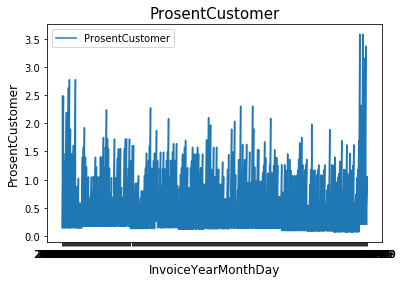

In [44]:
#отражает не общее число пользователей, а только процент вернувшихся
plt.plot(list(df_['InvoiceYearMonthDay']), list(df_['ProsentCustomer']), label='ProsentCustomer')
plt.title('ProsentCustomer', fontsize=15)
plt.xlabel('InvoiceYearMonthDay', fontsize=12)
plt.ylabel('ProsentCustomer', fontsize=12)
plt.legend()

In [45]:
#dau
df_DAU = df_unique_day.groupby(['InvoiceYearMonthDay']).count()
df_DAU = df_DAU.reset_index()
df_DAU = df_DAU[['InvoiceYearMonthDay', 'CustomerID']].reset_index(level=0, drop=True)
df_DAU.rename(columns={'CustomerID': 'DAU'}, inplace=True)
df_DAU

,InvoiceYearMonthDay,DAU
0,2010-12-01,66
1,2010-12-02,64
2,2010-12-03,37
3,2010-12-05,62
4,2010-12-06,61
...,...,...
300,2011-12-05,80
301,2011-12-06,78
302,2011-12-07,70
303,2011-12-08,80


In [46]:
def get_replace_my(row):
    return row['InvoiceYearMonthDay'][:7]

df_DAU['InvoiceYearMonth']  = df_DAU.apply(get_replace_my, axis=1)

In [47]:
df_DAU

,InvoiceYearMonthDay,DAU,InvoiceYearMonth
0,2010-12-01,66,2010-12
1,2010-12-02,64,2010-12
2,2010-12-03,37,2010-12
3,2010-12-05,62,2010-12
4,2010-12-06,61,2010-12
...,...,...,...
300,2011-12-05,80,2011-12
301,2011-12-06,78,2011-12
302,2011-12-07,70,2011-12
303,2011-12-08,80,2011-12


In [48]:
df_DAU = df_DAU.merge(df_MAU, how='right', on='InvoiceYearMonth')
df_DAU

,InvoiceYearMonthDay,DAU,InvoiceYearMonth,MAU
0,2010-12-01,66,2010-12,685
1,2010-12-02,64,2010-12,685
2,2010-12-03,37,2010-12,685
3,2010-12-05,62,2010-12,685
4,2010-12-06,61,2010-12,685
...,...,...,...,...
300,2011-12-05,80,2011-12,475
301,2011-12-06,78,2011-12,475
302,2011-12-07,70,2011-12,475
303,2011-12-08,80,2011-12,475


In [49]:
#какой % (уникальных) покупателей повторно сделали покупки в интернет-магазине каждый день
df_DAU['DAU_MAU'] = (df_DAU['DAU'] / df_DAU['MAU']) * 100
df_DAU

,InvoiceYearMonthDay,DAU,InvoiceYearMonth,MAU,DAU_MAU
0,2010-12-01,66,2010-12,685,9.635036
1,2010-12-02,64,2010-12,685,9.343066
2,2010-12-03,37,2010-12,685,5.401460
3,2010-12-05,62,2010-12,685,9.051095
4,2010-12-06,61,2010-12,685,8.905109
...,...,...,...,...,...
300,2011-12-05,80,2011-12,475,16.842105
301,2011-12-06,78,2011-12,475,16.421053
302,2011-12-07,70,2011-12,475,14.736842
303,2011-12-08,80,2011-12,475,16.842105


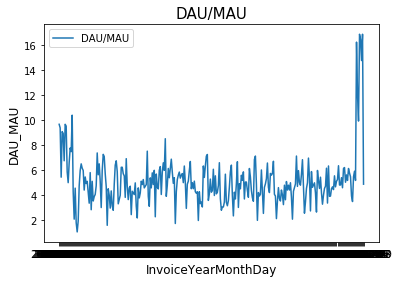

In [50]:
plt.plot(list(df_DAU['InvoiceYearMonthDay']), list(df_DAU['DAU_MAU']), label='DAU/MAU')
plt.title('DAU/MAU', fontsize=15)
plt.xlabel('InvoiceYearMonthDay', fontsize=12)
plt.ylabel('DAU_MAU', fontsize=12)
plt.legend()

##### Покупатели, которые совершили более 1 покупки (MOC - Multiple Order Customer)

In [51]:
df_SOC_MOC = df_unique.reset_index()

In [52]:
#MOC покупатели, которые делают повторные покупки в течение месяца (совершили более 1 покупки)
df_MOC = pd.DataFrame(df_SOC_MOC[df_SOC_MOC['InvoiceNo'] > 1])

df_MOC = df_MOC.groupby(['InvoiceYearMonth']).count()
df_MOC = df_MOC.reset_index()
df_MOC = df_MOC[['InvoiceYearMonth', 'CustomerID']].reset_index(level=0, drop=True)
df_MOC.rename(columns={'CustomerID': 'MOC'}, inplace=True)
df_MOC

,InvoiceYearMonth,MOC
0,2010-12,497
1,2011-01,423
2,2011-02,415
3,2011-03,550
4,2011-04,462
5,2011-05,577
6,2011-06,534
7,2011-07,538
8,2011-08,525
9,2011-09,763


##### Покупатели, которые сделали покупку и больше не вернулись (SOC - Single Order Customer)

In [53]:
#SOC покупатели, которые сделали покупку и больше не вернулись в течение месяца
df_SOC = pd.DataFrame(df_SOC_MOC[df_SOC_MOC['InvoiceNo'] == 1])

df_SOC = df_SOC.groupby(['InvoiceYearMonth']).count()
df_SOC = df_SOC.reset_index()
df_SOC = df_SOC[['InvoiceYearMonth', 'CustomerID']].reset_index(level=0, drop=True)
df_SOC.rename(columns={'CustomerID': 'SOC'}, inplace=True)
df_SOC

,InvoiceYearMonth,SOC
0,2010-12,188
1,2011-01,149
2,2011-02,166
3,2011-03,198
4,2011-04,210
5,2011-05,249
6,2011-06,228
7,2011-07,200
8,2011-08,194
9,2011-09,266


In [54]:
df_OC = df_MOC.merge(df_SOC, how='right', on='InvoiceYearMonth')
df_OC

,InvoiceYearMonth,MOC,SOC
0,2010-12,497,188
1,2011-01,423,149
2,2011-02,415,166
3,2011-03,550,198
4,2011-04,462,210
5,2011-05,577,249
6,2011-06,534,228
7,2011-07,538,200
8,2011-08,525,194
9,2011-09,763,266


In [55]:
df_rez = df_rez.merge(df_OC, how='right', on='InvoiceYearMonth')
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC
0,2010-12,56368.600,2616,2616,21.547630,685,497,188
1,2011-01,53963.920,2156,2156,25.029647,572,423,149
2,2011-02,43082.070,2006,2006,21.476605,581,415,166
3,2011-03,62843.250,2697,2697,23.301168,748,550,198
4,2011-04,44182.570,2201,2201,20.073862,672,462,210
5,2011-05,69838.760,2818,2818,24.783094,826,577,249
6,2011-06,68830.510,2697,2697,25.521138,762,534,228
7,2011-07,64559.360,2603,2603,24.801905,738,538,200
8,2011-08,67653.610,2772,2772,24.406064,719,525,194
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266


##### Показатель повторных покупок (RPR - Repeat Purchase Rate)

In [56]:
#процент покупателей, котрые покупали не один раз
df_rez['RPR'] = (df_rez['MOC'] / df_rez['MAU']) * 100
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660


##### Показатель разовых покупок ( OneTimeBuyers)

In [57]:
#процент покупателей, котрые совершили одну покупку
df_rez['OneTimeBuyers'] = (df_rez['SOC'] / df_rez['MAU']) * 100
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340


##### Средний Счет На Пользователя (ARPU — Average Revenue Per User)

In [58]:
df_rez['TotalVisitors'] = list_TotalVisitors

In [59]:
df_rez['ARPU'] = df_rez['TotalCost'] / df_rez['TotalVisitors']
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,TotalVisitors,ARPU
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,18260,3.086999
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,18283,2.951590
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,18283,2.356400
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,18283,3.437250
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,18283,2.416593
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,18287,3.819039
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,18287,3.763904
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,18287,3.530342
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,18287,3.699547
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,18287,5.029251


##### Средний Счет На Платящего Пользователя (ARPPU — Average Revenue Pay Per User)

In [60]:
df_rez['ARPPU'] = df_rez['TotalCost'] / df_rez['MAU']
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,TotalVisitors,ARPU,ARPPU
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,18260,3.086999,82.289927
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,18283,2.951590,94.342517
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,18283,2.356400,74.151583
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,18283,3.437250,84.015040
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,18283,2.416593,65.747872
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,18287,3.819039,84.550557
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,18287,3.763904,90.328753
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,18287,3.530342,87.478808
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,18287,3.699547,94.094033
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,18287,5.029251,89.377950


##### Процент платящих пользователей (Paying Share)

In [61]:
df_rez['Paying_Share'] = (df_rez['ARPU'] / df_rez['ARPPU']) * 100
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,TotalVisitors,ARPU,ARPPU,Paying_Share
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,18260,3.086999,82.289927,3.751369
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,18283,2.951590,94.342517,3.128589
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,18283,2.356400,74.151583,3.177815
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,18283,3.437250,84.015040,4.091232
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,18283,2.416593,65.747872,3.675546
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,18287,3.819039,84.550557,4.516870
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,18287,3.763904,90.328753,4.166895
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,18287,3.530342,87.478808,4.035654
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,18287,3.699547,94.094033,3.931755
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,18287,5.029251,89.377950,5.626948


##### Количество платежей на одного активного покупателя (TBU — Transactions by User)

In [62]:
df_rez['TBU'] = df_rez['CountOrder'] / df_rez['MAU']
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,TotalVisitors,ARPU,ARPPU,Paying_Share,TBU
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,18260,3.086999,82.289927,3.751369,3.818978
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,18283,2.951590,94.342517,3.128589,3.769231
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,18283,2.356400,74.151583,3.177815,3.452668
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,18283,3.437250,84.015040,4.091232,3.605615
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,18283,2.416593,65.747872,3.675546,3.275298
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,18287,3.819039,84.550557,4.516870,3.411622
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,18287,3.763904,90.328753,4.166895,3.539370
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,18287,3.530342,87.478808,4.035654,3.527100
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,18287,3.699547,94.094033,3.931755,3.855355
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,18287,5.029251,89.377950,5.626948,3.913508


##### Процент стоимости возвращенных товаров в общей выручке от продаж  (Return_Share)

In [63]:
df_rez = df_rez.merge(df_R, how='right', on='InvoiceYearMonth')
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,TotalVisitors,ARPU,ARPPU,Paying_Share,TBU,TotalCostReturn,CountOrderReturn,AverageReturn
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,18260,3.086999,82.289927,3.751369,3.818978,-3021.19,76,-39.752500
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,18283,2.951590,94.342517,3.128589,3.769231,-1894.70,65,-29.149231
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,18283,2.356400,74.151583,3.177815,3.452668,-2809.22,47,-59.770638
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,18283,3.437250,84.015040,4.091232,3.605615,-1029.43,74,-13.911216
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,18283,2.416593,65.747872,3.675546,3.275298,-1686.47,49,-34.417755
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,18287,3.819039,84.550557,4.516870,3.411622,-8481.28,57,-148.794386
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,18287,3.763904,90.328753,4.166895,3.539370,-881.80,56,-15.746429
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,18287,3.530342,87.478808,4.035654,3.527100,-2445.25,79,-30.952532
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,18287,3.699547,94.094033,3.931755,3.855355,-5377.84,74,-72.673514
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,18287,5.029251,89.377950,5.626948,3.913508,-5869.96,79,-74.303291


In [64]:
df_rez['Return_Share'] = abs(df_rez['TotalCostReturn'] / df_rez['TotalCost']) * 100
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,TotalVisitors,ARPU,ARPPU,Paying_Share,TBU,TotalCostReturn,CountOrderReturn,AverageReturn,Return_Share
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,18260,3.086999,82.289927,3.751369,3.818978,-3021.19,76,-39.752500,5.359704
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,18283,2.951590,94.342517,3.128589,3.769231,-1894.70,65,-29.149231,3.511050
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,18283,2.356400,74.151583,3.177815,3.452668,-2809.22,47,-59.770638,6.520624
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,18283,3.437250,84.015040,4.091232,3.605615,-1029.43,74,-13.911216,1.638092
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,18283,2.416593,65.747872,3.675546,3.275298,-1686.47,49,-34.417755,3.817048
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,18287,3.819039,84.550557,4.516870,3.411622,-8481.28,57,-148.794386,12.144087
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,18287,3.763904,90.328753,4.166895,3.539370,-881.80,56,-15.746429,1.281118
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,18287,3.530342,87.478808,4.035654,3.527100,-2445.25,79,-30.952532,3.787600
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,18287,3.699547,94.094033,3.931755,3.855355,-5377.84,74,-72.673514,7.949081
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,18287,5.029251,89.377950,5.626948,3.913508,-5869.96,79,-74.303291,6.382479


##### Показатель брошенных корзин (Cart Abandonment Rate)

In [65]:
df_rez = df_rez.merge(df_Cart_Abandonment_Rate, how='right', on='InvoiceYearMonth')
#кол-во товаров, которые положили в корзину
df_rez['CountOrderBasket'] = df_rez['CountOrderAbandonment'] + df_rez['CountOrder']

df_rez['Cart_Abandonment_Rate'] = (df_rez['CountOrderAbandonment'] / df_rez['CountOrderBasket']) * 100
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,...,ARPPU,Paying_Share,TBU,TotalCostReturn,CountOrderReturn,AverageReturn,Return_Share,CountOrderAbandonment,CountOrderBasket,Cart_Abandonment_Rate
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,...,82.289927,3.751369,3.818978,-3021.19,76,-39.752500,5.359704,1540,4156,37.054860
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,...,94.342517,3.128589,3.769231,-1894.70,65,-29.149231,3.511050,1343,3499,38.382395
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,...,74.151583,3.177815,3.452668,-2809.22,47,-59.770638,6.520624,759,2765,27.450271
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,...,84.015040,4.091232,3.605615,-1029.43,74,-13.911216,1.638092,911,3608,25.249446
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,...,65.747872,3.675546,3.275298,-1686.47,49,-34.417755,3.817048,695,2896,23.998619
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,...,84.550557,4.516870,3.411622,-8481.28,57,-148.794386,12.144087,778,3596,21.635150
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,...,90.328753,4.166895,3.539370,-881.80,56,-15.746429,1.281118,881,3578,24.622694
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,...,87.478808,4.035654,3.527100,-2445.25,79,-30.952532,3.787600,1217,3820,31.858639
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,...,94.094033,3.931755,3.855355,-5377.84,74,-72.673514,7.949081,746,3518,21.205230
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,...,89.377950,5.626948,3.913508,-5869.96,79,-74.303291,6.382479,918,4945,18.564206


##### Конверсия в покупку (Conversion Rate)

In [66]:
df_rez['Conversion_Rate'] = (df_rez['CountOrder'] / df_rez['CountOrderBasket']) * 100
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,...,Paying_Share,TBU,TotalCostReturn,CountOrderReturn,AverageReturn,Return_Share,CountOrderAbandonment,CountOrderBasket,Cart_Abandonment_Rate,Conversion_Rate
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,...,3.751369,3.818978,-3021.19,76,-39.752500,5.359704,1540,4156,37.054860,62.945140
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,...,3.128589,3.769231,-1894.70,65,-29.149231,3.511050,1343,3499,38.382395,61.617605
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,...,3.177815,3.452668,-2809.22,47,-59.770638,6.520624,759,2765,27.450271,72.549729
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,...,4.091232,3.605615,-1029.43,74,-13.911216,1.638092,911,3608,25.249446,74.750554
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,...,3.675546,3.275298,-1686.47,49,-34.417755,3.817048,695,2896,23.998619,76.001381
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,...,4.516870,3.411622,-8481.28,57,-148.794386,12.144087,778,3596,21.635150,78.364850
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,...,4.166895,3.539370,-881.80,56,-15.746429,1.281118,881,3578,24.622694,75.377306
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,...,4.035654,3.527100,-2445.25,79,-30.952532,3.787600,1217,3820,31.858639,68.141361
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,...,3.931755,3.855355,-5377.84,74,-72.673514,7.949081,746,3518,21.205230,78.794770
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,...,5.626948,3.913508,-5869.96,79,-74.303291,6.382479,918,4945,18.564206,81.435794


##### Доход (Revenue)

In [141]:
df_rez['Revenue'] = df_rez['TotalCost'] + df_rez['TotalCostReturn']
df_rez

,InvoiceYearMonth,TotalCost,CountOrder,CountProduct,AOV,MAU,MOC,SOC,RPR,OneTimeBuyers,...,TotalCostReturn,CountOrderReturn,AverageReturn,Return_Share,CountOrderAbandonment,CountOrderBasket,Cart_Abandonment_Rate,Conversion_Rate,iCount,Revenue
0,2010-12,56368.600,2616,2616,21.547630,685,497,188,72.554745,27.445255,...,-3021.19,76,-39.752500,5.359704,1540,4156,37.054860,62.945140,32.151940,53347.410
1,2011-01,53963.920,2156,2156,25.029647,572,423,149,73.951049,26.048951,...,-1894.70,65,-29.149231,3.511050,1343,3499,38.382395,61.617605,40.082857,52069.220
2,2011-02,43082.070,2006,2006,21.476605,581,415,166,71.428571,28.571429,...,-2809.22,47,-59.770638,6.520624,759,2765,27.450271,72.549729,41.091954,40272.850
3,2011-03,62843.250,2697,2697,23.301168,748,550,198,73.529412,26.470588,...,-1029.43,74,-13.911216,1.638092,911,3608,25.249446,74.750554,37.332973,61813.820
4,2011-04,44182.570,2201,2201,20.073862,672,462,210,68.750000,31.250000,...,-1686.47,49,-34.417755,3.817048,695,2896,23.998619,76.001381,34.132075,42496.100
5,2011-05,69838.760,2818,2818,24.783094,826,577,249,69.854722,30.145278,...,-8481.28,57,-148.794386,12.144087,778,3596,21.635150,78.364850,34.535645,61357.480
6,2011-06,68830.510,2697,2697,25.521138,762,534,228,70.078740,29.921260,...,-881.80,56,-15.746429,1.281118,881,3578,24.622694,75.377306,39.971639,67948.710
7,2011-07,64559.360,2603,2603,24.801905,738,538,200,72.899729,27.100271,...,-2445.25,79,-30.952532,3.787600,1217,3820,31.858639,68.141361,40.839130,62114.110
8,2011-08,67653.610,2772,2772,24.406064,719,525,194,73.018081,26.981919,...,-5377.84,74,-72.673514,7.949081,746,3518,21.205230,78.794770,47.736189,62275.770
9,2011-09,91969.911,4027,4027,22.838319,1029,763,266,74.149660,25.850340,...,-5869.96,79,-74.303291,6.382479,918,4945,18.564206,81.435794,42.336449,86099.951


In [142]:
df_rez.to_csv('rez.csv', sep=';', encoding='cp1251')

##### Срок удержания (LifeTime  Month)

In [69]:
df_data_year = df_data[ df_data['InvoiceYearMonth'] != '2010-12'] 

In [70]:
#количество заказов
df_Customer = df_data_year.pivot_table(index=['CustomerID'], columns=['InvoiceYearMonth'], values='InvoiceNo', aggfunc='count', fill_value=0, margins=False).reset_index()
df_Customer

InvoiceYearMonth,CustomerID,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,12347.0,2,0,0,3,0,0,0,0,0,4,0,2
1,12348.0,0,0,0,0,0,0,0,0,1,0,0,0
2,12349.0,0,0,0,0,0,0,0,0,0,0,7,0
3,12350.0,0,3,0,0,0,0,0,0,0,0,0,0
4,12352.0,0,1,4,0,0,0,0,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,18278.0,0,0,0,0,0,0,0,0,2,0,0,0
3681,18281.0,0,0,0,0,0,1,0,0,0,0,0,0
3682,18282.0,0,0,0,0,0,0,0,1,0,0,0,0
3683,18283.0,10,2,0,5,5,12,2,0,3,4,25,2


In [71]:
def get_LT_m(row):
    fl = 0
    
    for i in list_col:
        if row[i] > 0:
            fl += 1
            
    return fl

list_col = ['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']
df_Customer['LifeTime_Month']  = df_Customer.apply(get_LT_m, axis=1)

In [72]:
#период - 1 год 2010
df_1 = pd.DataFrame(df_Customer[['CustomerID', 'LifeTime_Month']])
df_1

InvoiceYearMonth,CustomerID,LifeTime_Month
0,12347.0,4
1,12348.0,1
2,12349.0,1
3,12350.0,1
4,12352.0,3
...,...,...
3680,18278.0,1
3681,18281.0,1
3682,18282.0,1
3683,18283.0,10


##### Пожизненная ценность книента (LTV - LifeTimeValue)

In [73]:
#сумма заказов
df_Customer_cost = df_data_year.pivot_table(index=['CustomerID'], columns=['InvoiceYearMonth'], values='Cost', aggfunc='sum', fill_value=0, margins=False).reset_index()
df_Customer_cost

InvoiceYearMonth,CustomerID,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12
0,12347.0,53.25,0.00,0.0,44.20,0.00,0.00,0.00,0.00,0.00,83.16,0.00,21.68
1,12348.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,150.00,0.00,0.00,0.00
2,12349.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,106.84,0.00
3,12350.0,0.00,49.80,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,12352.0,0.00,17.85,115.4,0.00,0.00,0.00,0.00,0.00,51.15,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,18278.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,49.50,0.00,0.00,0.00
3681,18281.0,0.00,0.00,0.0,0.00,0.00,16.50,0.00,0.00,0.00,0.00,0.00,0.00
3682,18282.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,22.95,0.00,0.00,0.00,0.00
3683,18283.0,23.60,3.35,0.0,9.61,12.18,33.37,18.33,0.00,7.15,16.87,83.82,7.02


In [74]:
def get_LT_m(row):
    fl = 0
    
    for i in list_col:
        if row[i] > 0:
            fl = fl + row[i]
            
    return fl

list_col = ['2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']
df_Customer_cost['TotalCostCustomer']  = df_Customer_cost.apply(get_LT_m, axis=1)

In [75]:
df_2 = pd.DataFrame(df_Customer_cost[['CustomerID', 'TotalCostCustomer']])
df_2

InvoiceYearMonth,CustomerID,TotalCostCustomer
0,12347.0,202.29
1,12348.0,150.00
2,12349.0,106.84
3,12350.0,49.80
4,12352.0,184.40
...,...,...
3680,18278.0,49.50
3681,18281.0,16.50
3682,18282.0,22.95
3683,18283.0,215.30


In [76]:
#период - 1 год 2010
df_LTV = df_1.merge(df_2, how='right', on='CustomerID')
#df_LTV['LTV'] = round(df_LTV['TotalCostCustomer'] * df_LTV['LifeTime_Month'], 2)
#df_LTV = df_LTV.sort_values(by='LTV', ascending=False)
df_LTV

InvoiceYearMonth,CustomerID,LifeTime_Month,TotalCostCustomer
0,12347.0,4,202.29
1,12348.0,1,150.00
2,12349.0,1,106.84
3,12350.0,1,49.80
4,12352.0,3,184.40
...,...,...,...
3680,18278.0,1,49.50
3681,18281.0,1,16.50
3682,18282.0,1,22.95
3683,18283.0,10,215.30


In [77]:
#среднее время удержания за год
Avg_LifeTime = df_LTV['LifeTime_Month'].mean()
Avg_LifeTime

2.603527815468114

In [78]:
#кол-во клиентов
CountCustomer = df_LTV['CustomerID'].count()
CountCustomer

3685

In [79]:
#общий доход
Sum_TotalCostCustomer = df_LTV['TotalCostCustomer'].sum()
Sum_TotalCostCustomer

825923.971

In [80]:
#LTV за год
#прибыль от одного покупателя за год
LTV = Avg_LifeTime *  (Sum_TotalCostCustomer / CountCustomer)
LTV

583.5321660679458